
<h2> Analyst: Eben Jalyn Apolinario</h2>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway

In [2]:
sick = pd.read_csv('dataset\\dengue.csv')                        

In [3]:
sick

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
sick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


<h1> Data Cleansing </h1>

In [5]:
sick.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h1> Changing Data Types </h1>

In [6]:
sick.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [7]:
sick['Month'] = sick['Month'].astype('category')
sick['Year'] = sick['Year'].astype('category')
sick['Region'] = sick['Region'].astype('category')

In [8]:
sick.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1> Insight 1 What month has the highest dengue case ?</h1>
<h2> Result shows that the month that has the highest dengue case is the month of August </h2>

<h1> Insight 2 What month has the lowest dengue case ?</h1>
<h2> Result shows that the month that has the lowest dengue case is the month of May </h2>

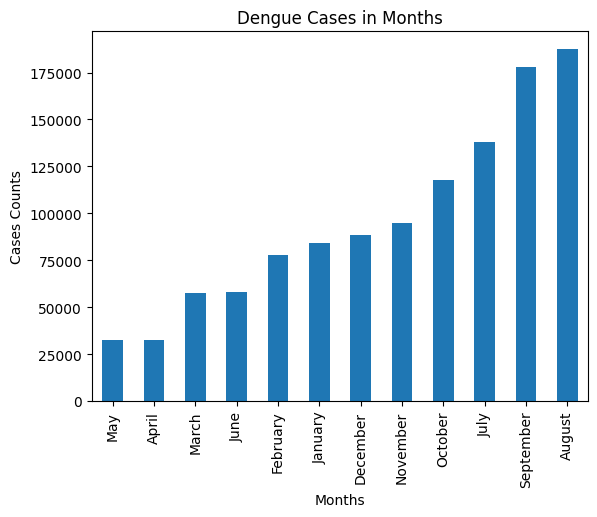

In [9]:
case = sick.groupby('Month')['Dengue_Cases'].sum().sort_values()

case.plot(kind="bar")
plt.title('Dengue Cases in Months')
plt.xlabel('Months')
plt.ylabel('Cases Counts')
plt.show()

<h1> Insight 3 What is the average of dengue cases ? </h1>
<h2> The average of dengue cases is 1124.93 </h2>

In [10]:
avg1 = sick['Dengue_Cases'].mean()

avg1


1124.9264705882354

<h1> Insight 4 What month has the highest death case ? </h1>
<h2> Month of October has the highest death case among all other months </h2>

<h1> Insight 5 What month has the lowest death case ? </h1>
<h2> Month of May has the lowest death case among all other months </h2>

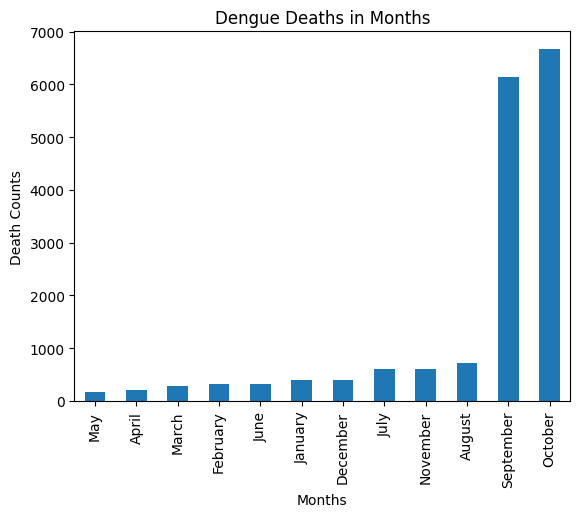

In [11]:
death = sick.groupby('Month')['Dengue_Deaths'].sum().sort_values()

death.plot(kind="bar")
plt.title('Dengue Deaths in Months')
plt.xlabel('Months')
plt.ylabel('Death Counts')
plt.show()

<h1> Insight 6 What is the average of death cases ? </h1>
<h2> The average of death cases is 16.51 </h2>

In [12]:
avg2 = sick['Dengue_Deaths'].mean()

avg2

16.51372549019608

<h1> Insight 7 What Region has the highest Dengue cases ?</h1>
<h2> The region that has the highest dengue cases is Region VI A</h2>

<h1> Insight 8 What Region has the lowest Dengue cases ?</h1>
<h2> The region that has the lowest dengue cases is BARMM</h2>

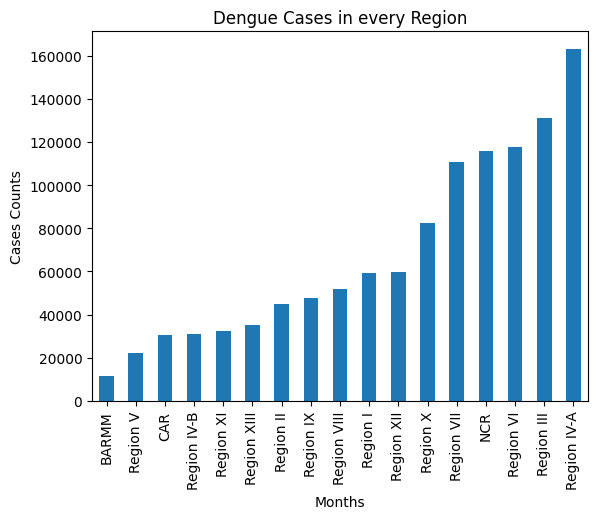

In [13]:
caseperregion = sick.groupby('Region')['Dengue_Cases'].sum().sort_values()

caseperregion.plot(kind="bar")
plt.title('Dengue Cases in every Region')
plt.xlabel('Months')
plt.ylabel('Cases Counts')
plt.show()

<h1> Insight 9 What region has the highest death case ? </h1>
<h2> NCR has the highest death case among all other regions</h2>

<h1> Insight 10 What region has the highest death case ? </h1>
<h2> Region IV B has the lowest death case among all other regions</h2>

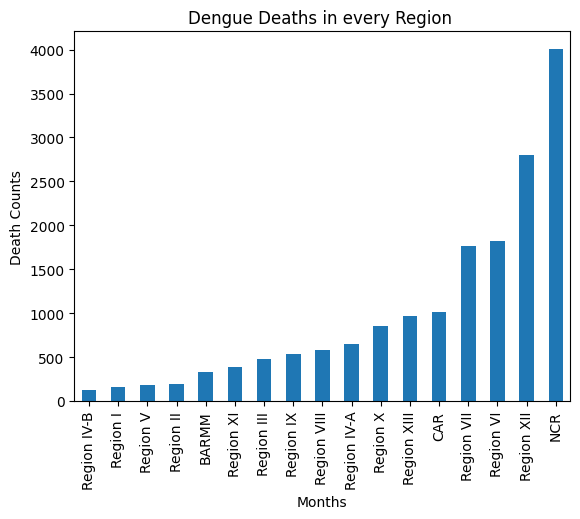

In [14]:
deathperregion = sick.groupby('Region')['Dengue_Deaths'].sum().sort_values()

deathperregion.plot(kind="bar")
plt.title('Dengue Deaths in every Region ')
plt.xlabel('Months')
plt.ylabel('Death Counts')
plt.show()

<h1> Insight 11 What year has the highest Dengue Cases? </h1>
<h2> From 2016 to 2022, 2019 has the highest Dengue Cases with 38.5% </h2>

<h1> Insight 12 What year has the lowest Dengue Cases? </h1>
<h2> From 2016 to 2022, 2020 has the lowest Dengue Cases with 7.9%  </h2>

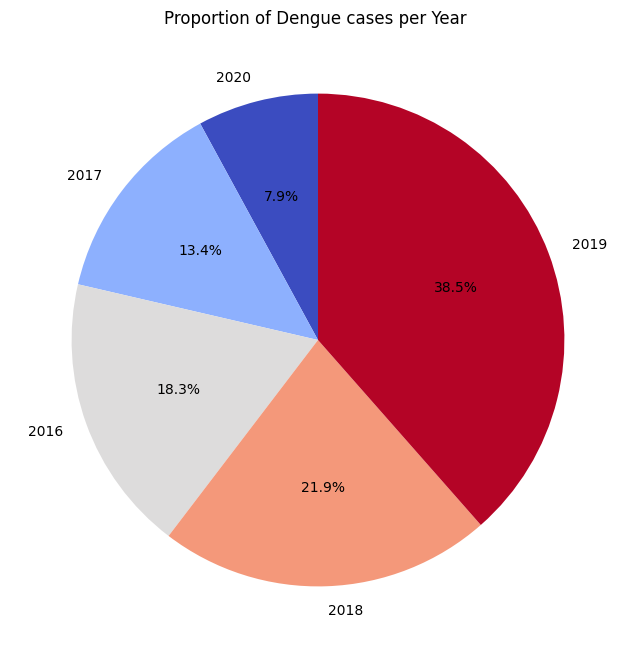

In [17]:
caseinyears = sick.groupby('Year')['Dengue_Cases'].sum().sort_values()

caseinyears.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))
plt.title('Proportion of Dengue Cases per Year ')
plt.ylabel('')
plt.show()

<h1> Insight 13 What year has the highest Death Case? </h1>
<h2> From 2016 to 2020, year 2016 has the highest Death Case with 48.2%</h2>


<h1> Insight 14 What year has the lowest Death Case? </h1>
<h2> From 2016 to 2020, year 2020 has the lowest Death Case with 7.1%</h2>

<h2> It can be seen that throughout the years the number of deaths are decreasing which implies that there are actions made to prevent the deaths caused by Dengue</h2>

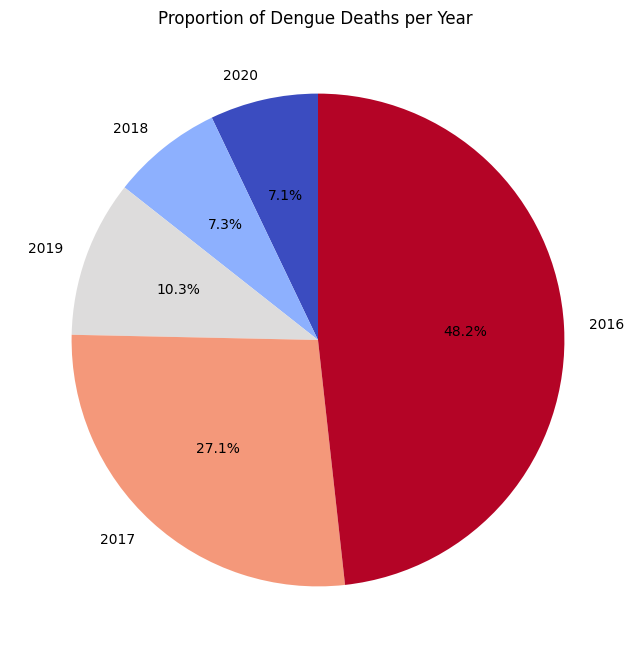

In [20]:
deathinyear = sick.groupby('Year')['Dengue_Deaths'].sum().sort_values()

deathinyear.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', figsize=(8, 8))
plt.title('Proportion of Dengue Deaths per Year ')
plt.ylabel('')
plt.show()

<h1> Insight 15 What region in year 2019 has the highest dengue case </h1>
<h2> Since the data above shows that year 2019 has the highest dengue case I want to know what region contributed to it. The graph below shows that regio VI A has the highest dengue case in year 2019</h2>

<h1> Insight 16 What region in year 2019 has the lowest dengue case </h1>
<h2> The graph below shows that BARMM has the lowest dengue case in year 2019</h2>

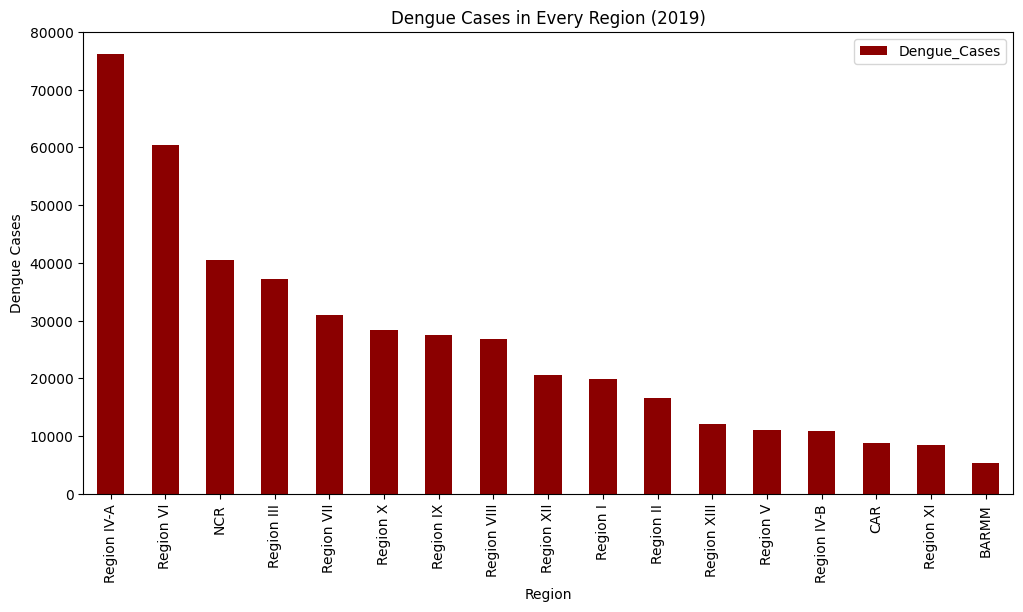

In [28]:
data_2019 = sick[sick['Year'] == 2019]

# Group by Region and sum the cases
region_summary_2019 = data_2019.groupby('Region')['Dengue_Cases'].sum().reset_index()

# Sort by Dengue cases for better visualization
region_summary_2019 = region_summary_2019.sort_values(by='Dengue_Cases', ascending=False)

region_summary_2019


region_summary_2019.plot(kind="bar", x="Region", y="Dengue_Cases", color="darkred", figsize=(12, 6))

# Setting labels and title
plt.title('Dengue Cases in Every Region (2019)')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')


plt.show()


<h1> Insight 17 What region in year 2016 has the highest dengue deaths </h1>
<h2> Since the data above shows that year 2016 has the highest dengue Deaths I want to know what region mostly contributed to it. The graph below shows that NCR has the highest dengue deaths in year 2016 </h2>

<h1> Insight 18 What region in year 2016 has the lowest dengue deaths </h1>
<h2> The graph below shows that Region II has the lowest dengue deaths in year 2016 </h2>

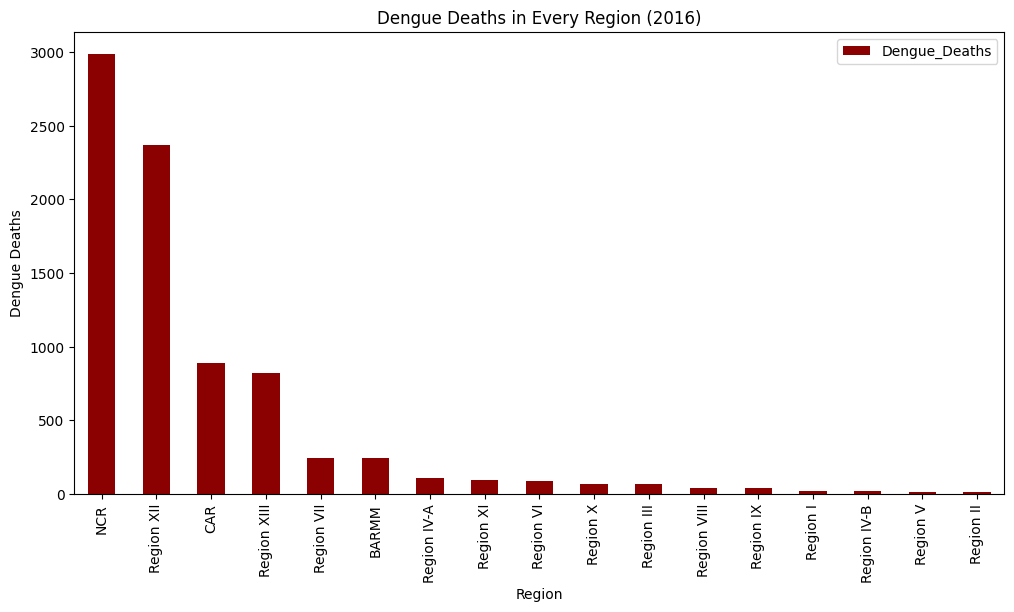

In [30]:
data_2016 = sick[sick['Year'] == 2016]


region_summary_2016 = data_2016.groupby('Region')['Dengue_Deaths'].sum().reset_index()


region_summary_2016 = region_summary_2016.sort_values(by='Dengue_Deaths', ascending=False)

region_summary_2016


region_summary_2016.plot(kind="bar", x="Region", y="Dengue_Deaths", color="darkred", figsize=(12, 6))


plt.title('Dengue Deaths in Every Region (2016)')
plt.xlabel('Region')
plt.ylabel('Dengue Deaths')


plt.show()


<h1> Insight 19 What region in year 2020 has the highest dengue deaths </h1>
<h2> Since the data above shows that year 2020 has the lowest dengue Deaths among other years I want to know what region mostly contributed to it. The graph below shows that NCR still has the highest dengue deaths in year 2020 </h2>

<h1> Insight 20 What region in year 2020 has the lowest dengue deaths </h1>
<h2> The graph below shows that Region II still has the lowest dengue deaths in year 2020 </h2>

<h2> NCR and Region II remain the highest and lowest number of dengue deaths respectively. While for some regions the record shows lower deaths while for some is higher record of deaths</h2>

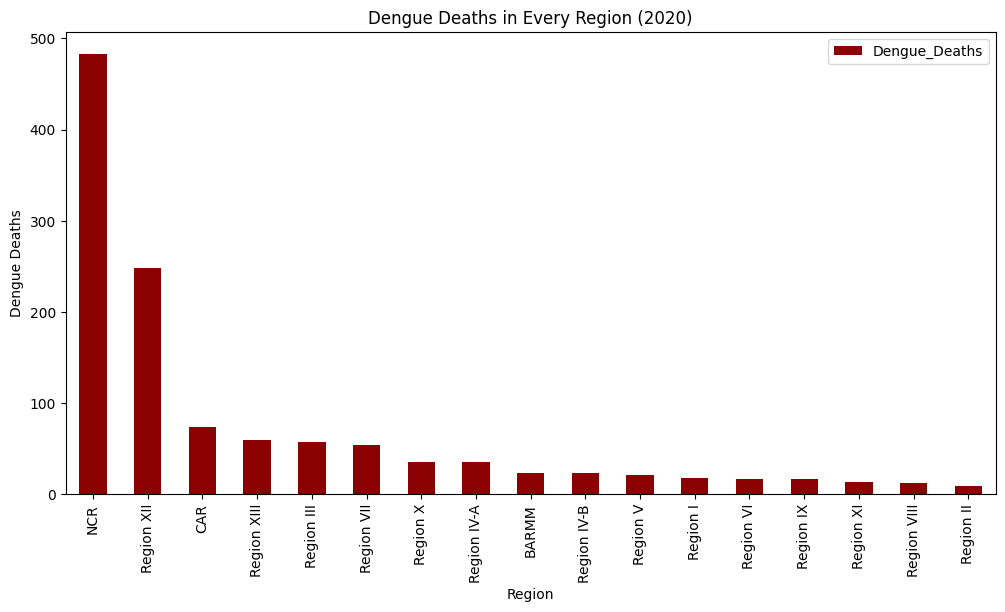

In [36]:
data_2020 = sick[sick['Year'] == 2020]


region_summary_2020 = data_2020.groupby('Region')['Dengue_Deaths'].sum().reset_index()


region_summary_2020 = region_summary_2020.sort_values(by='Dengue_Deaths', ascending=False)

region_summary_2020


region_summary_2020.plot(kind="bar", x="Region", y="Dengue_Deaths", color="darkred", figsize=(12, 6))


plt.title('Dengue Deaths in Every Region (2020)')
plt.xlabel('Region')
plt.ylabel('Dengue Deaths')


plt.show()
